# **Курсовая работа по дисциплине "Автоматика и регулирование ЖРД"**

### Исходные данные

In [1]:
# Параметры возмущения
p1_0=400e3
A=100e3
T=0.2
# Давления в трубах
p2 = 300e3
p3 = 100e3
# Параметры газа
k = 1.4
R = 297
c = 1200
mгаз = 0.0034
Vг0 = 0.001
Tгаз0 = 293
# Параметры демпфера в начале
Vд_0 = 0
mд_0 = 0
# Параметры жидкоси
Vж0 = 0.004
ρж = 820
# Коэффициент инерционности
j1 = 400
j2 = 400
j3 = 400
jд = 20
# Коэффициент гидросопротивления
ξ1 = 1000
ξ2 = 1000 
ξ3 = 1000
ξд = 1000

#### Заметка

In [2]:
# Для АЧХ ФЧХ
# def p1(t):
#     p1 = p1_0 + A *np.sin(2*np.pi * t / T) 
#     return p1

### Стационарная задача. Решением стационарной задачи являются начальными условиями задачи.

In [2]:
from scipy.optimize import fsolve
import numpy as np
import random
# Определяем функцию для fsolve
def equations(vars):
  m1_0, m2_0, m3_0, p4_0, pgas_0 = vars
  eq1 = m1_0 + m2_0 - m3_0
  eq2 = p4_0 - pgas_0
  eq3 = p1_0 - p4_0 - ξ1*m1_0**2
  eq4 = p4_0 - p3 - ξ3*m3_0**2
  eq5 = p2 - p4_0 - ξ2*m2_0**2
  return [eq1, eq2, eq3, eq4, eq5]
# Вводим случайные приближения
initial_guess = [random.random() for _ in range(5)]
# Пока корни меньше нуля менять случайные приближения
while min(fsolve(equations, initial_guess)) <= 0:
  initial_guess = [random.random() for _ in range(5)]
# Вывод решения
solution = fsolve(equations, initial_guess)
print("Solution:", solution)
# Присваивание значений переменным
m1_0 = solution[0]
m2_0 = solution[1]
m3_0 = solution[2]
p4_0 = solution[3]
pgas_0 = solution[4]
# Вывод переменных
print("m1_0=", m1_0) 
print("m2_0=", m2_0) 
print("m3_0=", m3_0)
print("p4_0=", p4_0) 
print("pgas_0=", pgas_0)


Solution: [1.05146222e+01 3.24919696e+00 1.37638192e+01 2.89442719e+05
 2.89442719e+05]
m1_0= 10.514622242432477
m2_0= 3.2491969622833814
m3_0= 13.763819204715858
p4_0= 289442.71910055197
pgas_0= 289442.71910055197


/usr/local/Caskroom/miniconda/base/envs/unienv/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


### Динамическая задача с демпфером.

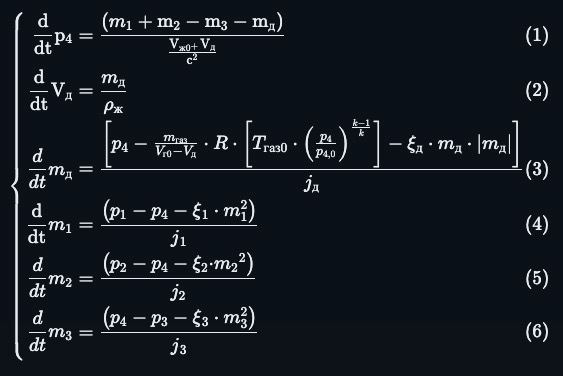

In [5]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Определение системы дифференциальных уравнений
def system(y, t):
    # Искомые параметры
    p4, Vд, mд, m1, m2, m3 = y
    # Дифференциальные уравнения
    d_p4 = (m1 + m2 - m3 - mд) / ((Vж0 + Vд) / c**2)
    d_Vд = mд / ρж
    d_mд = (p4 - (mгаз / (Vг0 - Vд)) * R * 
            (Tгаз0 * ((p4 / p4_0)**((k-1)/k))) - ξд * mд * abs(mд)) / jд
    d_m1 = (p1(t) - p4 - ξ1 * m1*abs(m1)) / j1
    d_m2 = (p2 - p4 - ξ2 * m2*abs(m2)) / j2
    d_m3 = (p4 - p3 - ξ3 * m3*abs(m3)) / j3
    # Возвращение значений искомых параметров
    return [d_p4, d_Vд, d_mд, d_m1, d_m2, d_m3]

# Определение возмущающей функции
def p1(t):
    if t<0:
        p1=0
    if 0 <= t < T/2:
        p1 = (p1_0 + A*(np.sin(2*np.pi / T*(t-T/4)) + 1))
    else:
        p1 = (p1_0 + 2*A)
    return p1

# Параметры вычисления. Время и шаг.
t_end = 1
h = 6000000

# Задаются начальные условия и массив точек по времени.
y0 = [p4_0, Vд_0, mд_0, m1_0, m2_0, m3_0]
t = np.linspace(0, t_end, h)

# Решение системы
sol = odeint(system, y0, t)

# Вывод полученных значений
print(pd.DataFrame(data=sol))

                     0             1         2          3         4          5
0        289442.719101  0.000000e+00  0.000000  10.514622  3.249197  13.763819
1        289442.720708 -5.444345e-15 -0.000054  10.514622  3.249197  13.763819
2        289442.725529 -2.177738e-14 -0.000107  10.514622  3.249197  13.763819
3        289442.733565 -4.899909e-14 -0.000161  10.514622  3.249197  13.763819
4        289442.744815 -8.710947e-14 -0.000214  10.514622  3.249197  13.763819
...                ...           ...       ...        ...       ...        ...
5999995  307335.937265  2.065966e-05 -0.000010  17.107455 -2.708321  14.399131
5999996  307335.937958  2.065966e-05 -0.000009  17.107455 -2.708321  14.399131
5999997  307335.938650  2.065966e-05 -0.000009  17.107455 -2.708321  14.399131
5999998  307335.939342  2.065966e-05 -0.000009  17.107455 -2.708321  14.399131
5999999  307335.940034  2.065966e-05 -0.000009  17.107455 -2.708321  14.399132

[6000000 rows x 6 columns]


#### Графики

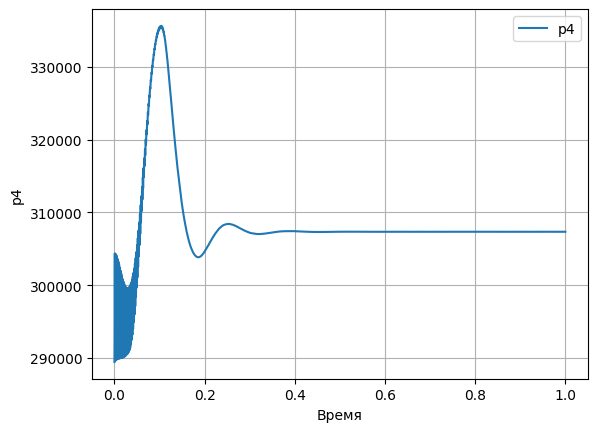

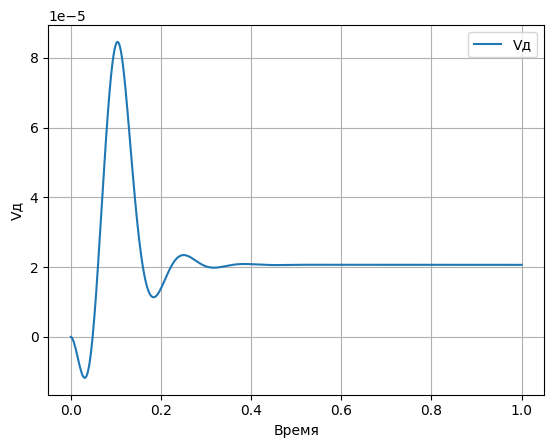

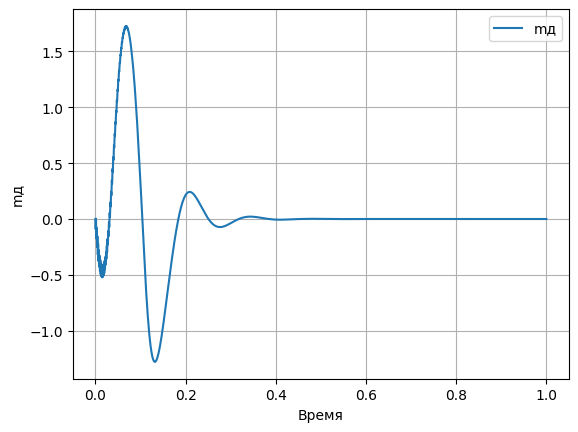

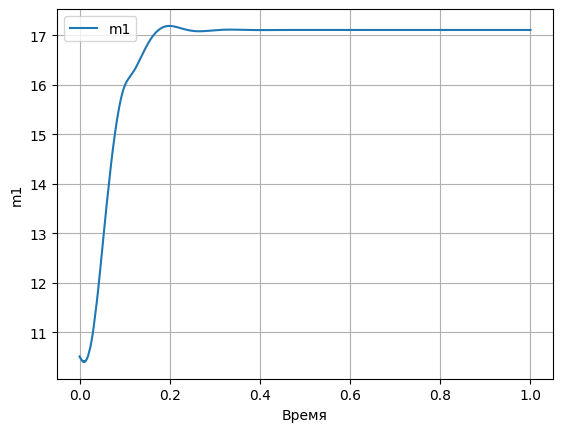

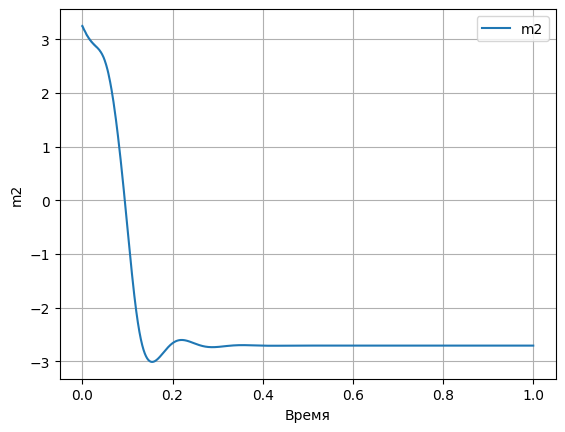

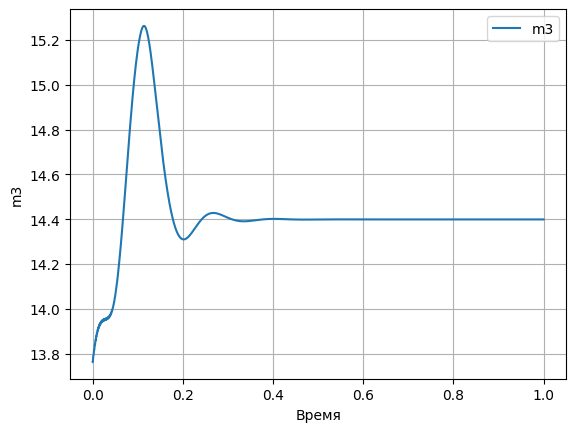

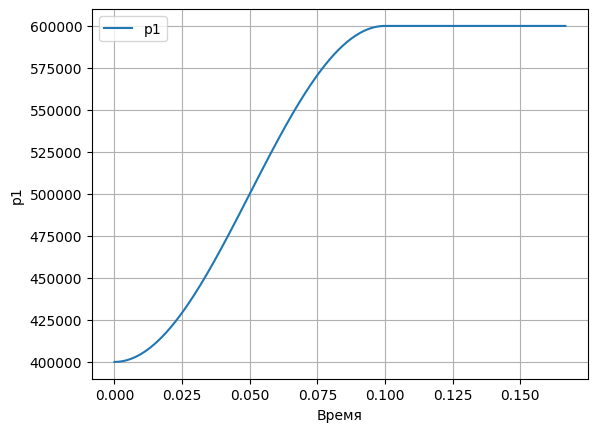

In [4]:
def plot(t, y, label):
    plt.plot(t, y, label=label)
    plt.grid(True)
    plt.xlabel("Время")
    plt.ylabel(label)
    plt.legend()
    plt.show()


plot(t, sol[:, 0], "p4")
plot(t, sol[:, 1], "Vд")
plot(t, sol[:, 2], "mд")
plot(t, sol[:, 3], "m1")
plot(t, sol[:, 4], "m2")
plot(t, sol[:, 5], "m3")
# plot(t, sol[:, 6], "pgas_0")
plot(t[:int(h/6)], [p1(t) for t in t][:int(h/6)], "p1")

### Динамическая задача без демпфера

In [6]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Определение системы дифференциальных уравнений
def system(y, t):
    # Искомые параметры
    p4, m1, m2, m3 = y
    # Дифференциальные уравнения
    d_p4 = (m1 + m2 - m3) / ((Vж0) / c**2)
    d_m1 = (p1(t) - p4 - ξ1 * m1*abs(m1)) / j1
    d_m2 = (p2 - p4 - ξ2 * m2*abs(m2)) / j2
    d_m3 = (p4 - p3 - ξ3 * m3*abs(m3)) / j3
    # Возвращение значений искомых параметров
    return [d_p4, d_m1, d_m2, d_m3]

# Определение возмущающей функции
def p1(t):
    if t<0:
        p1=0
    if 0 <= t < T/2:
        p1 = (p1_0 + A*(np.sin(2*np.pi / T*(t-T/4)) + 1))
    else:
        p1 = (p1_0 + 2*A)
    return p1

# Параметры вычисления. Время и шаг.
t_end = 1
h = 6000000

# Задаются начальные условия и массив точек по времени.
y0 = [p4_0, m1_0, m2_0, m3_0]
t = np.linspace(0, t_end, h)

# Решение системы
sol = odeint(system, y0, t)

# Вывод полученных значений
print(pd.DataFrame(data=sol))

                     0          1         2          3
0        289442.719098  10.514622  3.249197  13.763819
1        289442.719098  10.514622  3.249197  13.763819
2        289442.719098  10.514622  3.249197  13.763819
3        289442.719098  10.514622  3.249197  13.763819
4        289442.719098  10.514622  3.249197  13.763819
...                ...        ...       ...        ...
5999995  307334.893571  17.107454 -2.708322  14.399133
5999996  307334.893507  17.107454 -2.708322  14.399133
5999997  307334.893443  17.107454 -2.708322  14.399133
5999998  307334.893380  17.107454 -2.708322  14.399133
5999999  307334.893316  17.107454 -2.708322  14.399133

[6000000 rows x 4 columns]


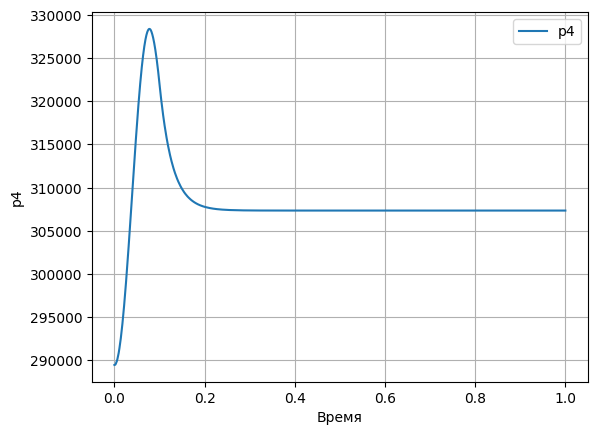

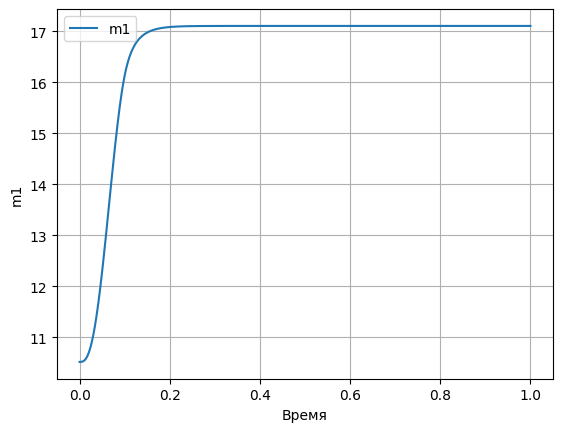

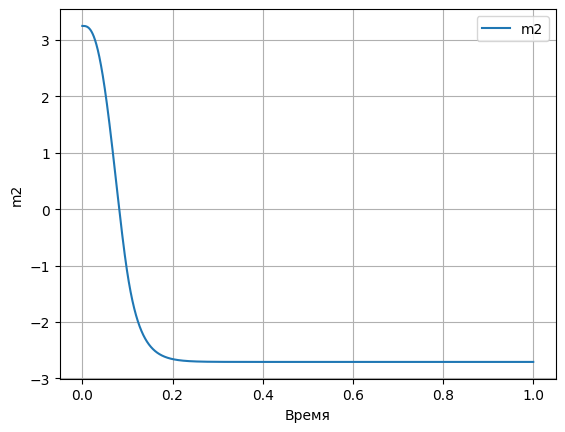

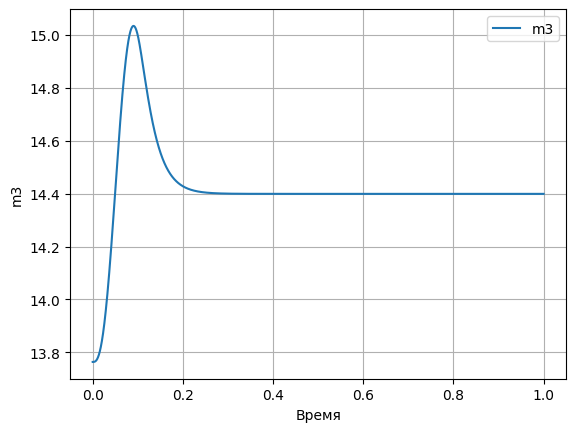

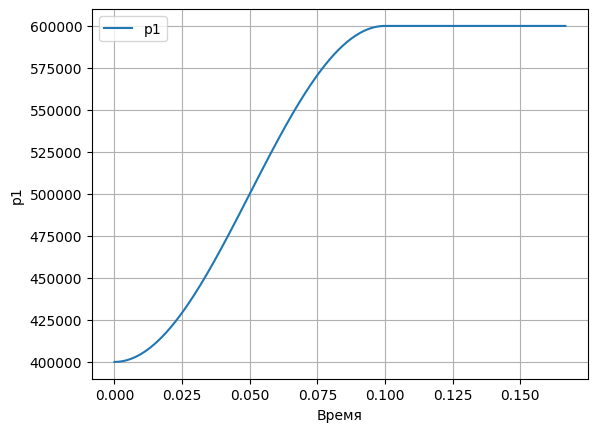

In [7]:
def plot(t, y, label):
    plt.plot(t, y, label=label)
    plt.grid(True)
    plt.xlabel("Время")
    plt.ylabel(label)
    plt.legend()
    plt.show()


plot(t, sol[:, 0], "p4")
plot(t, sol[:, 1], "m1")
plot(t, sol[:, 2], "m2")
plot(t, sol[:, 3], "m3")
# plot(t, sol[:, 6], "pgas_0")
plot(t[:int(h/6)], [p1(t) for t in t][:int(h/6)], "p1")

In [8]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Определение возмущающей функции
def p11(t):
    if t<0:
        p11=0
    else:
          p11 = (p1_0 + A*(np.sin(2*np.pi / T*(t-T/4)) + 1))
    return p11
    

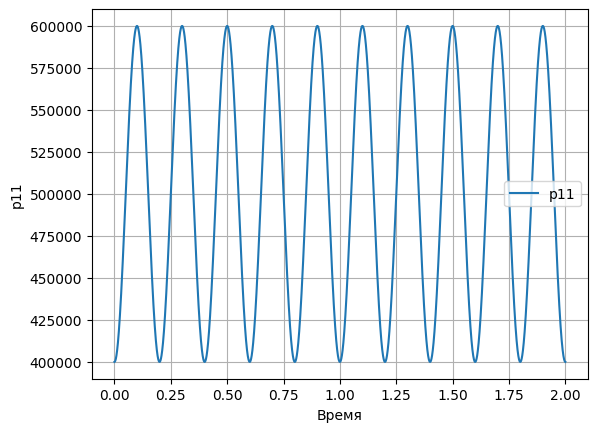

In [9]:
 def plot(t, y, label):
    plt.plot(t, y, label=label)
    plt.grid(True)
    plt.xlabel("Время")
    plt.ylabel(label)
    plt.legend()
    plt.show()

# Параметры вычисления. Время и шаг.
t_end = 12
h = 6000000

t = np.linspace(0, t_end, h)

plot(t[:int(h/6)], [p11(t) for t in t][:int(h/6)], "p11")

### Построение АЧХ системы с демпфером

#### Решение

In [23]:
import warnings

warnings.filterwarnings("ignore")


def p1_sin(t, freq):
    """ Функция возмущения """
    return (p1_0 + A*(np.sin(freq*(t-2*np.pi/4/freq)) + 1))


def system_afc(y, t, freq):
    p4, Vд, mд, m1, m2, m3 = y

    d_p4 = (m1 + m2 - m3 - mд) / ((Vж0 + Vд) / c**2)
    d_Vд = mд / ρж
    d_mд = (p4 - (mгаз / (Vг0 - Vд)) * R * 
            (Tгаз0 * ((p4 / p4_0)**((k-1)/k))) - ξд * mд * abs(mд)) / jд
    d_m1 = (p1_sin(t, freq) - p4 - ξ1 * m1*abs(m1)) / j1
    d_m2 = (p2 - p4 - ξ2 * m2*abs(m2)) / j2
    d_m3 = (p4 - p3 - ξ3 * m3*abs(m3)) / j3

    return [d_p4, d_Vд, d_mд, d_m1, d_m2, d_m3]


# Решение системы
frequancy = np.arange(0, 110, 10)
sol_afc = []
for i, freq in enumerate(frequancy):
    sol_afc.append(odeint(system_afc, y0, t, (freq,)))

In [ ]:
print(pd.DataFrame(data=sol_afc[1]))
# print(pd.DataFrame(data=sol_afc[2]))
# print(pd.DataFrame(data=sol_afc[3]))
# print(pd.DataFrame(data=sol_afc[4]))
# print(pd.DataFrame(data=sol_afc[5]))

#### Графики

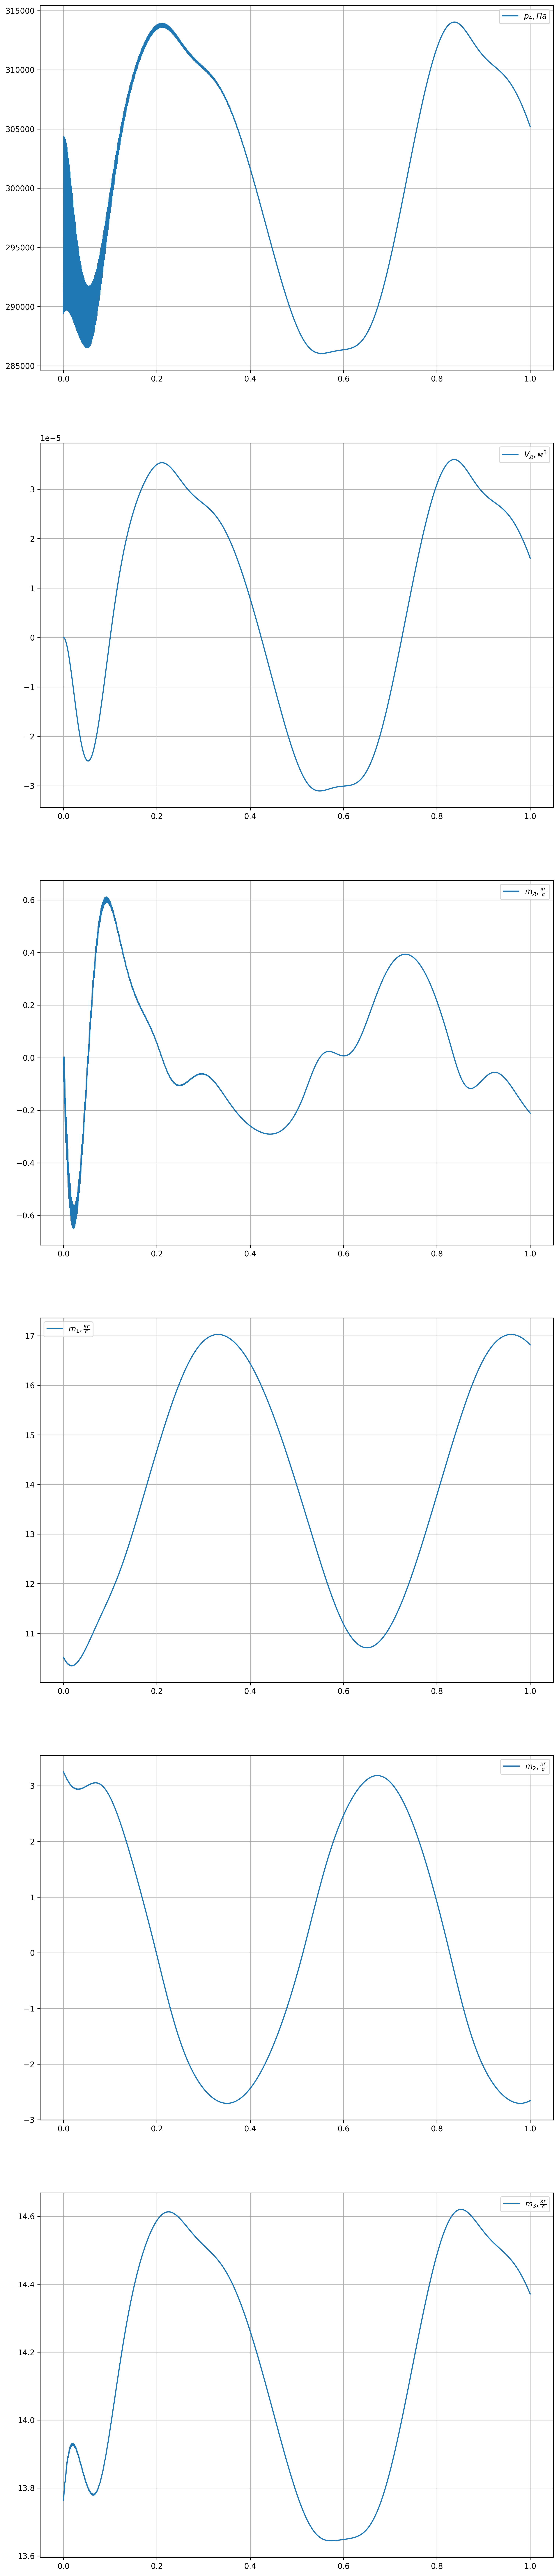

In [37]:
fig, axs = plt.subplots(6, 1, figsize=(12, 60), dpi=300)

axs[0].plot(t, sol_afc[1][:, 0], label=r"$p_4, Па$")
axs[1].plot(t, sol_afc[1][:, 1], label=r"$V_д, м^3$")
axs[2].plot(t, sol_afc[1][:, 2], label=r"$m_д, \frac{кг}{с}$")
axs[3].plot(t, sol_afc[1][:, 3], label=r"$m_1, \frac{кг}{с}$")
axs[4].plot(t, sol_afc[1][:, 4], label=r"$m_2, \frac{кг}{с}$")
axs[5].plot(t, sol_afc[1][:, 5], label=r"$m_3, \frac{кг}{с}$")

for ax in axs:
    ax.grid()
    ax.legend()

plt.show()

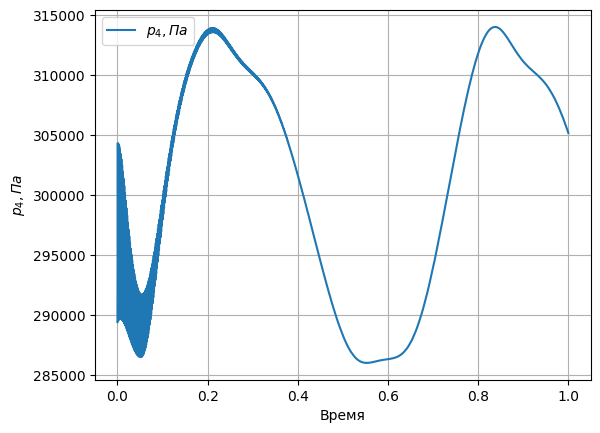

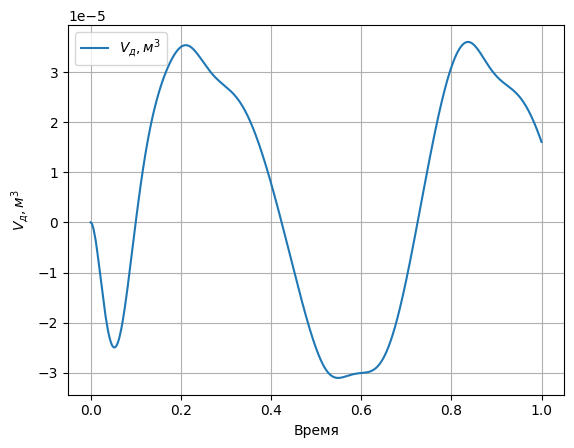

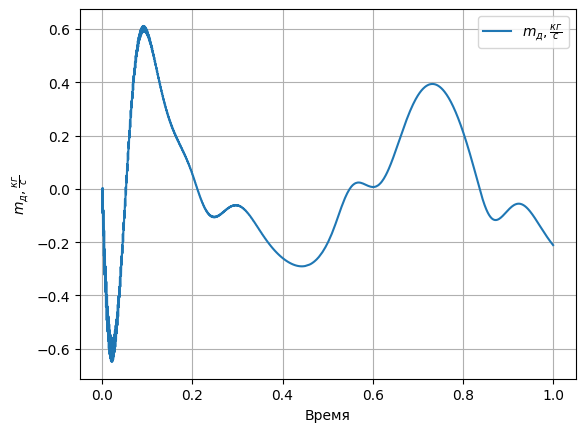

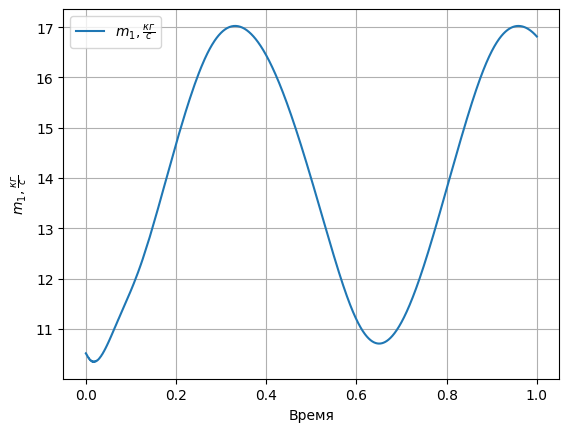

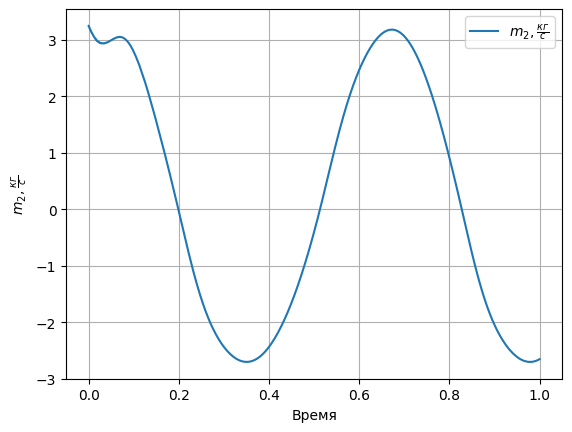

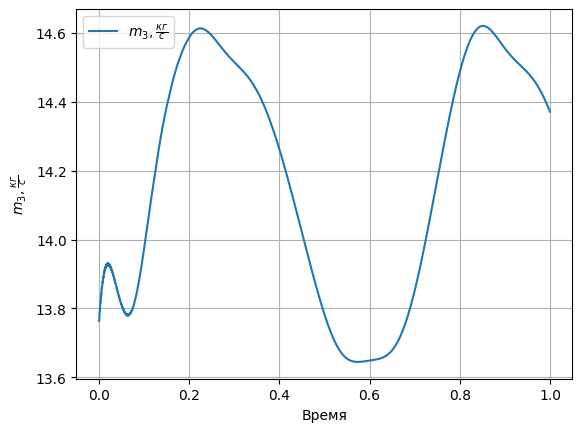

In [30]:
plot(t, sol_afc[1][:, 0], r"$p_4, Па$")
plot(t, sol_afc[1][:, 1], r"$V_д, м^3$")
plot(t, sol_afc[1][:, 2], r"$m_д, \frac{кг}{с}$")
plot(t, sol_afc[1][:, 3], r"$m_1, \frac{кг}{с}$")
plot(t, sol_afc[1][:, 4], r"$m_2, \frac{кг}{с}$")
plot(t, sol_afc[1][:, 5], r"$m_3, \frac{кг}{с}$")